# História das Olimpíadas - Parte 2

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
sns.set_theme()

%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format

atletas_ol = pd.read_csv('athlete_events.csv')
atletas_ol.sample(10)

ID                        Name Sex   Age  Height  Weight  \
218970  109986   Mariya Sergeyevna Shorets   F 25.00  166.00   55.00   
138999   69824     Jorma Tapio Liimatainen   M 24.00  170.00   65.00   
269300  134752  Lyubov Yegorovna Zhigalova   F 32.00     NaN     NaN   
92938    47090              Helmut Hediger   M 27.00  179.00   77.00   
175516   88219                Hugh O'Hagan   M   NaN     NaN     NaN   
123540   62424                 Zdenk Konen   M 24.00  204.00   96.00   
56779    29094             Musa Dogon Yaro   M 23.00  172.00   70.00   
191640   96212             Slobodan Popovi   M 29.00  179.00   63.00   
264586  132401       Rampai Yamfang-Sriyai   F 37.00  151.00   55.00   
112006   56728             Toshihiro Kaiwa   M 28.00  166.00   62.00   

                               Team  NOC        Games  Year  Season  \
218970                       Russia  RUS  2016 Summer  2016  Summer   
138999                      Finland  FIN  1972 Summer  1972  Summer   
269300                 Soviet Union  URS  1956 Summer  1956  Summer   
92938                       Austria  AUT  1972 Summer  1972  Summer   
175516                      Ireland  IRL  1948 Summer  1948  Summer   
123540               Czechoslovakia  TCH  1960 Summer  1960  Summer   
56779                       Nigeria  NGR  1968 Summer  1968  Summer   
191640  Individual Olympic Athletes  IOA  1992 Summer  1992  Summer   
264586                     Thailand  THA  1992 Summer  1992  Summer   
112006                        Japan  JPN  1984 Winter  1984  Winter   

                  City          Sport  \
218970  Rio de Janeiro      Triathlon   
138999          Munich      Wrestling   
269300       Melbourne         Diving   
92938           Munich       Canoeing   
175516          London         Boxing   
123540            Roma     Basketball   
56779      Mexico City      Athletics   
191640       Barcelona      Athletics   
264586       Barcelona       Shooting   
112006        Sarajevo  Alpine Skiing   

                                              Event Medal  
218970           Triathlon Women's Olympic Distance   NaN  
138999     Wrestling Men's Featherweight, Freestyle   NaN  
269300                      Diving Women's Platform   NaN  
92938    Canoeing Men's Kayak Doubles, 1,000 metres   NaN  
175516               Boxing Men's Light-Heavyweight   NaN  
123540                  Basketball Men's Basketball   NaN  
56779          Athletics Men's 4 x 400 metres Relay   NaN  
191640                   Athletics Men's 800 metres   NaN  
264586  Shooting Women's Sporting Pistol, 25 metres   NaN  
112006             Alpine Skiing Men's Giant Slalom   NaN

## 1. O Brasil nas Olimpíadas

Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [3]:
# localizando os atletas do Brasil pela coluna NOC, percebemos depois de que Team pode aparecer Brazil - 1 para alguns atletas
atletas_br = atletas_ol.loc[atletas_ol['NOC'] == 'BRA']


# o dataset possui muitos valores ausentes em altura e peso
# uma forma de preencher os valores faltantes, é colocar a média de altura do esporte pelo genero
atletas_br['Height'] = atletas_br['Height'].fillna(atletas_br.groupby(['Sex', 'Sport'])['Height'].transform('mean'))

# apenas um valor nao foi preenchido, 
#pois possui somente um atleta de um esporte que nao esta mais em olimpiadas, será preenchido com zero na proxima celula
# preenchendo com 0 o valor ausente
atletas_br[atletas_br['Height'].isna()]=0

# implementando a mesma resolução para o peso
atletas_br['Weight'] = atletas_br['Weight'].fillna(atletas_br.groupby(['Sex', 'Sport'])['Weight'].transform('mean'))
# veriicando se possui ainda dados ausentes

# verificando os valores ausentes em Idade, se percebe que são de edições mais antigas das olimpiadas

# para preencher esses valores, usams a mesma logica das anteriores, mas, como tentativa para se chegar na realidade daquela temporada
# usamos o media do esporte e do ano para preenche-los, ja que todos sao do sexo masculino
atletas_br['Age'] = atletas_br['Age'].fillna(atletas_br.groupby(['Sport', 'Year'])['Age'].transform('mean'))

#ainda restaram valores ausentes, provalmente por nao exister outros atletas neste criterio para puxar os dados de média
# assim, usamos a logica de gerero e esporte para completar esses valores
atletas_br['Age'] = atletas_br['Age'].fillna(atletas_br.groupby(['Sex', 'Sport'])['Age'].transform('mean'))

#  dataframe com atletas medalhistas usando dropna que irá retirar as linhas(atletas) com medal com valor nan
atletas_br_medal = atletas_br.dropna(subset=['Medal'])
atletas_br_medal

<ipython-input-3-578269fa0167>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atletas_br['Height'] = atletas_br['Height'].fillna(atletas_br.groupby(['Sex', 'Sport'])['Height'].transform('mean'))
<ipython-input-3-578269fa0167>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atletas_br[atletas_br['Height'].isna()]=0
C:\Users\Pc\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

ID                                          Name Sex   Age  \
1651       918                           Ademir Roque Kaefer   M 24.00   
1652       918                           Ademir Roque Kaefer   M 28.00   
1668       925           Adenzia Aparecida Ferreira da Silva   F 25.00   
1733       966                                  Daniel Adler   M 26.00   
1856      1020                  Adriana Aparecida dos Santos   F 25.00   
...        ...                                           ...  ..   ...   
267709  133931                      Arthur Nabarrete Zanetti   M 26.00   
268211  134186              Jos Elias "Z Elias" Moedim Jnior   M 19.00   
268218  134190  Jos Marco "Z Marco" Nobrega Ferreira de Melo   M 29.00   
268219  134191                Jos Marcelo "Z Maria" Ferreira   M 22.00   
268247  134211                        Jos Carlos Cracco Neto   M 22.00   

        Height  Weight      Team  NOC        Games  Year  Season  \
1651    179.00   74.00    Brazil  BRA  1984 Summer  1984  Summer   
1652    179.00   74.00    Brazil  BRA  1988 Summer  1988  Summer   
1668    187.00   65.00    Brazil  BRA  2012 Summer  2012  Summer   
1733    180.00   72.00    Brazil  BRA  1984 Summer  1984  Summer   
1856    180.00   61.00    Brazil  BRA  1996 Summer  1996  Summer   
...        ...     ...       ...  ...          ...   ...     ...   
267709  156.00   61.00    Brazil  BRA  2016 Summer  2016  Summer   
268211  178.00   75.00    Brazil  BRA  1996 Summer  1996  Summer   
268218  190.00   86.00  Brazil-1  BRA  2000 Summer  2000  Summer   
268219  175.00   71.00    Brazil  BRA  1996 Summer  1996  Summer   
268247  170.00   69.00    Brazil  BRA  2016 Summer  2016  Summer   

                  City             Sport  \
1651       Los Angeles          Football   
1652             Seoul          Football   
1668            London        Volleyball   
1733       Los Angeles           Sailing   
1856           Atlanta        Basketball   
...                ...               ...   
267709  Rio de Janeiro        Gymnastics   
268211         Atlanta          Football   
268218          Sydney  Beach Volleyball   
268219         Atlanta          Football   
268247  Rio de Janeiro          Football   

                                          Event   Medal  
1651                    Football Men's Football  Silver  
1652                    Football Men's Football  Silver  
1668              Volleyball Women's Volleyball    Gold  
1733        Sailing Mixed Three Person Keelboat  Silver  
1856              Basketball Women's Basketball  Silver  
...                                         ...     ...  
267709                   Gymnastics Men's Rings  Silver  
268211                  Football Men's Football  Bronze  
268218  Beach Volleyball Men's Beach Volleyball  Silver  
268219                  Football Men's Football  Bronze  
268247                  Football Men's Football    Gold  

[476 rows x 15 columns]

Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

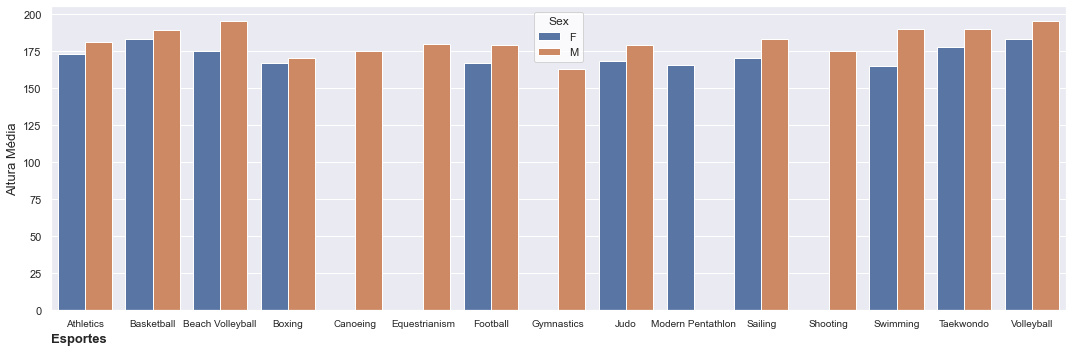

In [4]:

esportes_medal = atletas_br_medal['Sport'].value_counts().index.drop_duplicates('Sport').drop(0).sort_values().tolist()
altura_esporte_medal = atletas_br_medal.groupby(['Sport','Sex'])['Height'].mean().drop(0).sort_index().reset_index()

fig, axes = plt.subplots(figsize=(15, 5));

sns.set_style('whitegrid')
sns.barplot(data = altura_esporte_medal, x = 'Sport', y = 'Height', hue= 'Sex');
sns.set_palette(['lightcoral', 'royalblue'])

plt.xticks(fontsize=10)

axes.set_xlabel('Esportes', fontsize = 13, weight='bold', loc = 'left');
axes.set_ylabel('Altura Média', fontsize = 13);
fig.tight_layout();

Agora gere um gráfico semelhante ilustrando o peso dos atletas.

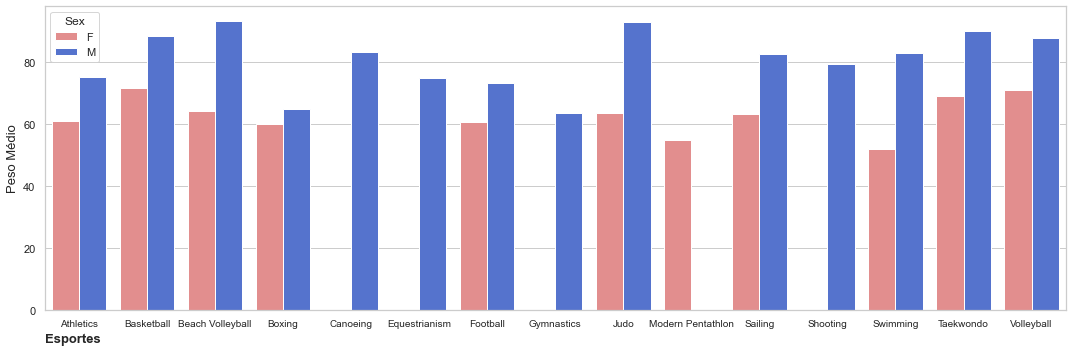

In [5]:
peso_esporte_medal = atletas_br_medal.groupby(['Sport','Sex'])['Weight'].mean().drop(0).sort_index().reset_index()

fig, axes = plt.subplots(figsize=(15, 5));

sns.set_style('whitegrid')
sns.barplot(data = peso_esporte_medal, x = 'Sport', y = 'Weight', hue= 'Sex');
sns.set_palette(['lightcoral', 'royalblue'])

plt.xticks(fontsize=10)

axes.set_xlabel('Esportes', fontsize = 13, weight='bold', loc = 'left');
axes.set_ylabel('Peso Médio', fontsize = 13);
fig.tight_layout();

Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**. Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

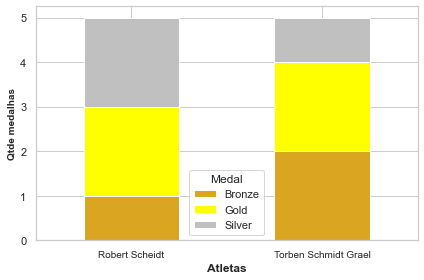

In [6]:
maior_medal = atletas_br_medal.groupby('Name')['Medal'].value_counts().drop(0).reset_index(name = 'Quantidade')
order = ['Gold' , 'Silver', 'Bronze']
pivot = maior_medal.pivot(index= 'Name', columns = 'Medal', values = 'Quantidade').fillna(0).reset_index()

soma = pivot['Gold'] + pivot['Silver'] + pivot['Bronze']
maior_medal = soma.max()
maiores_medal = pivot.loc[pivot['Bronze'] + pivot['Gold'] + pivot['Silver'] == maior_medal]

sns.set_style('whitegrid')
sns.set_palette(['goldenrod', 'yellow', 'silver'])
maiores_medal.set_index('Name').plot(kind='bar', stacked=True );
plt.xticks(fontsize=10, rotation = 0)
plt.xlabel('Atletas', fontsize = 12, weight='bold', loc = 'center');
plt.ylabel('Qtde medalhas', fontsize = 10, weight='bold', loc = 'center');

plt.tight_layout()

Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

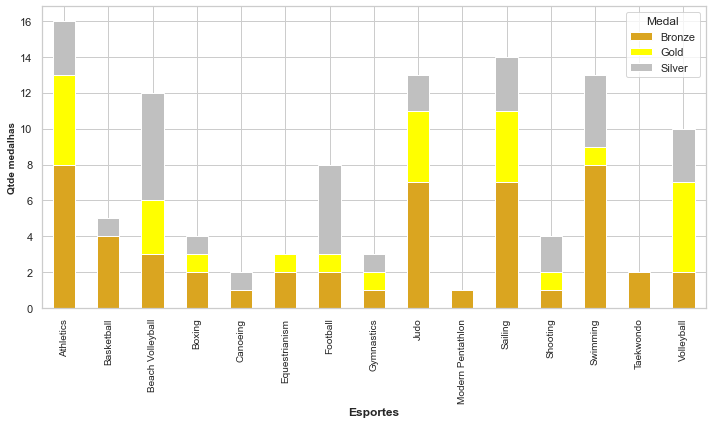

In [7]:
# utilizando o drop_duplicates para remover medalhas do mesmo esporte e ano, assim unificando medalha de esporte em equipe
esportes__br = atletas_br_medal.drop_duplicates(subset = ['Year', 'Sport', 'Medal'])
# separando esportes por medalhas, drop para retirar um sport que tem o valor 0
esportes_medal_br = esportes__br.groupby('Sport')['Medal'].value_counts().drop(0).reset_index(name = 'Quantidade')

pivot_esport = esportes_medal_br.pivot(index= 'Sport', columns = 'Medal', values = 'Quantidade').fillna(0).reset_index()


sns.set_style('whitegrid')
sns.set_palette(['goldenrod', 'yellow', 'silver'])
pivot_esport.set_index('Sport').plot(kind='bar', stacked=True, figsize=(10,6) );

plt.xticks(fontsize=10, rotation = 90)
plt.xlabel('Esportes', fontsize = 12, weight='bold', loc = 'center');

plt.ylabel('Qtde medalhas', fontsize = 10, weight='bold', loc = 'center');
plt.tight_layout();

Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

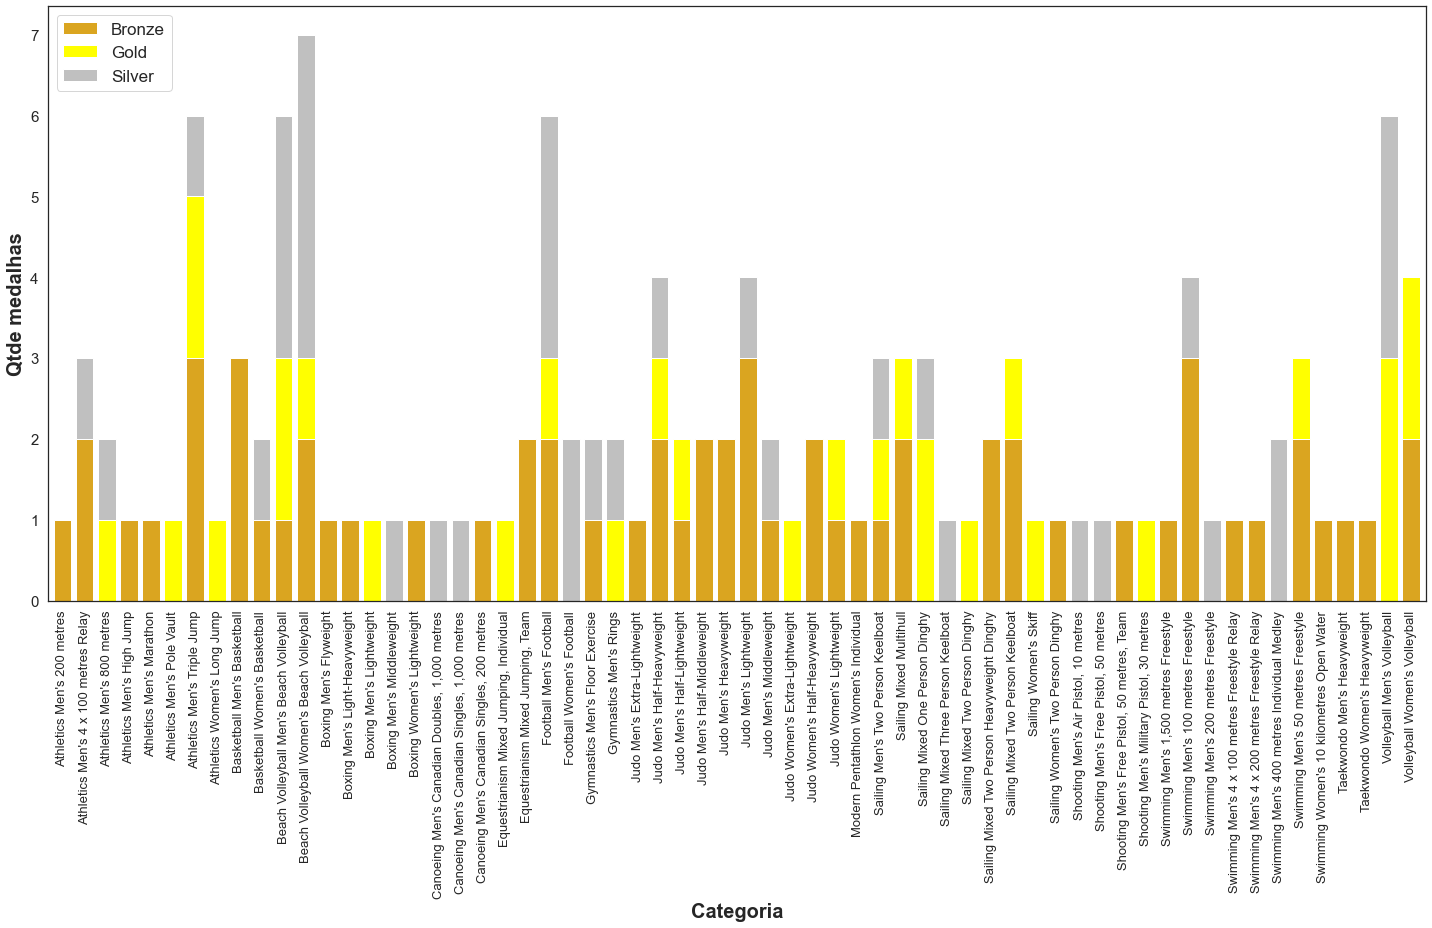

In [8]:
# utilizando o drop_duplicates para remover medalhas do mesmo esporte e ano, assim unificando medalha de esporte em equipe
esportes__br = atletas_br_medal.drop_duplicates(subset = ['Year', 'Event', 'Medal'])
# separando esportes por medalhas, drop para retirar um sport que tem o valor 0
esportes_medal_br = esportes__br.groupby('Event')['Medal'].value_counts().drop(0).reset_index(name = 'Quantidade')

pivot_esport = esportes_medal_br.pivot(index= 'Event', columns = 'Medal', values = 'Quantidade').fillna(0).reset_index()


sns.set_style('white')
sns.set_palette(['goldenrod', 'yellow', 'silver'])
pivot_esport.set_index('Event').plot(kind='bar', stacked=True, figsize=(20,13), width=0.8 );

plt.xticks(fontsize=13, rotation = 90)
plt.yticks(fontsize=15)
plt.xlabel('Categoria', fontsize = 20, weight='bold', loc = 'center');
plt.ylabel('Qtde medalhas', fontsize = 20, weight='bold', loc = 'center');
plt.legend(loc='upper left', fontsize = 17)
plt.tight_layout();



Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

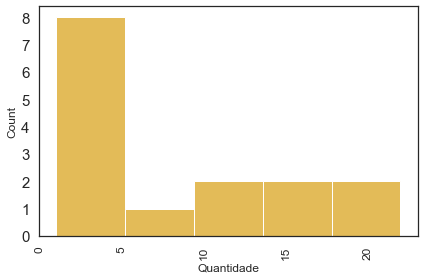

In [9]:
esportes_medal_br_histg = esportes__br.groupby('Sport')['Medal'].count().drop(0).reset_index(name = 'Quantidade')

sns.set_style('white')
sns.histplot(esportes_medal_br_histg['Quantidade']);

plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=15)
plt.tight_layout();


Repita o procedimento acima, mas com medalhas de ouro.

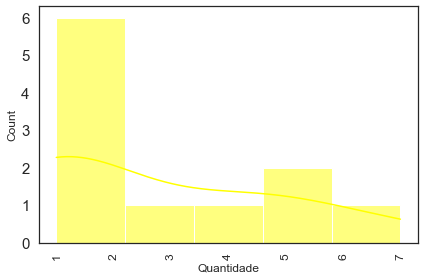

In [10]:
tp_medal_sport_br = esportes__br.groupby('Sport')['Medal'].value_counts().drop(0).reset_index(name = 'Quantidade')
ouro_medal_br = tp_medal_sport_br[tp_medal_sport_br['Medal']== 'Gold']
esportes_ouro = ouro_medal_br['Sport'].tolist()

sns.set_style('white')
sns.histplot(ouro_medal_br['Quantidade'], color = 'yellow', kde=True);

plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=15)
plt.tight_layout();


Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

In [11]:
px.pie(ouro_medal_br, values='Quantidade', names='Sport', title='Medalhas de ouro por esporte');

Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

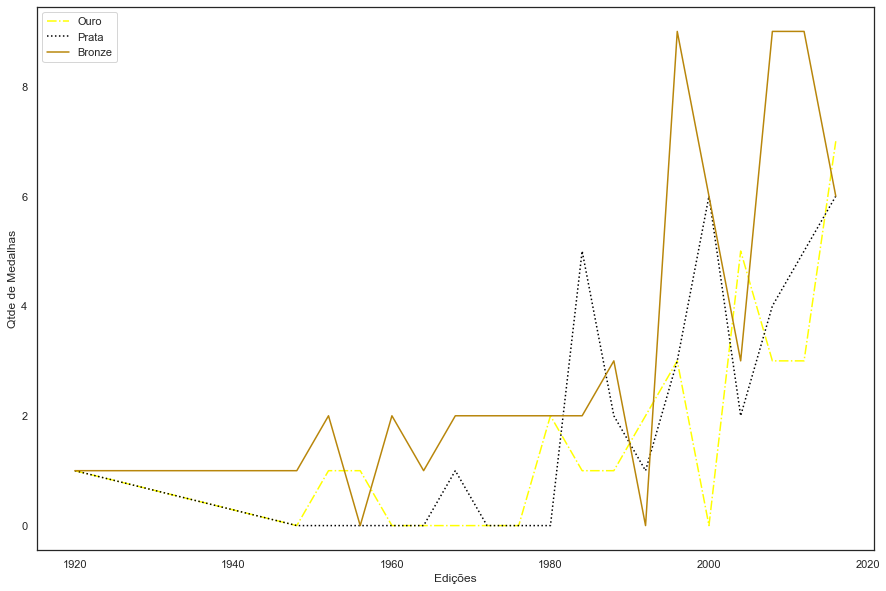

In [12]:
# utilizando o df ja tratado em sem medalhas de esporte em equipe
tipo_medal = esportes__br.groupby(['Year'])['Medal'].value_counts().drop(0).reset_index(name = 'Quantidade')
pivot_tipo_medal = tipo_medal.pivot(index = 'Year', columns = 'Medal', values = 'Quantidade').fillna(0)

fig, axes = plt.subplots(figsize=(15, 10));
sns.set_style('white')
plt.xlabel('Edições')
plt.ylabel('Qtde de Medalhas')

plt.plot(pivot_tipo_medal.index, pivot_tipo_medal['Gold'], ls='-.', color='yellow')
plt.plot(pivot_tipo_medal.index, pivot_tipo_medal['Silver'], ls=':', color='black')
plt.plot(pivot_tipo_medal.index, pivot_tipo_medal['Bronze'], ls='-', color='darkgoldenrod')

plt.legend(['Ouro', 'Prata', 'Bronze']);

## 2. O mundo nos jogos de verão

Filtre o DataFrame original para conter apenas informações sobre os **medalhistas** de todos os países **nos jogos de verão**.



In [13]:
# separando por atletas com medalhas
atletas_medal_mundo = atletas_ol.dropna(subset=['Medal'])
atletas_medal_mundo.sample(5)

ID                    Name Sex   Age  Height  Weight  \
137984   69335              Li Dongmei   F 22.00  192.00   75.00   
73229    37216            Ugo Frigerio   M 30.00  171.00   55.00   
18227     9669       Kacey Lee Bellamy   F 26.00  170.00   66.00   
255516  127923  Katrin Wagner-Augustin   F 22.00  179.00   70.00   
225419  113264           Slobodan Soro   M 33.00  196.00  100.00   

                 Team  NOC        Games  Year  Season         City  \
137984          China  CHN  1992 Summer  1992  Summer    Barcelona   
73229           Italy  ITA  1932 Summer  1932  Summer  Los Angeles   
18227   United States  USA  2014 Winter  2014  Winter        Sochi   
255516        Germany  GER  2000 Summer  2000  Summer       Sydney   
225419         Serbia  SRB  2012 Summer  2012  Summer       London   

             Sport                                     Event   Medal  
137984  Basketball             Basketball Women's Basketball  Silver  
73229    Athletics        Athletics Men's 50 kilometres Walk  Bronze  
18227   Ice Hockey             Ice Hockey Women's Ice Hockey  Silver  
255516    Canoeing  Canoeing Women's Kayak Fours, 500 metres    Gold  
225419  Water Polo               Water Polo Men's Water Polo  Bronze

Utilizando subplots, crie 2 boxplots ilustrando a quantidade de medalhas por atleta. Em um deles, considere todos os atletas. No segundo, experimente remover os *outliers*.

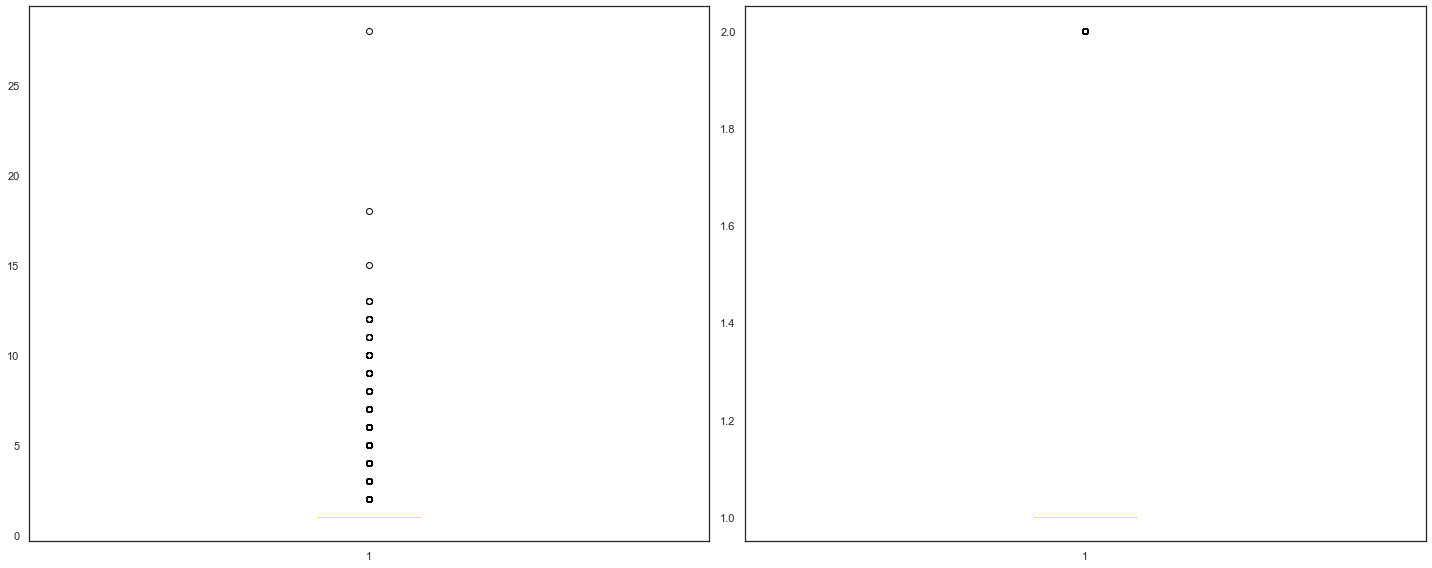

In [14]:
# agrupando por atletas e qtde de medalhas
medal_por_atleta = atletas_medal_mundo.groupby('Name')['Medal'].count().reset_index()
# utilizando quartil 
quartil_medal = medal_por_atleta.quantile([0.2,0.8])
#criando DF separado  pelo quartil
medal_sem_out = medal_por_atleta[ (medal_por_atleta['Medal'] >= quartil_medal.loc[0.2, 'Medal']) &
                      (medal_por_atleta['Medal'] <= quartil_medal.loc[0.8, 'Medal'])]

plt.subplots(figsize=(20,8))
# grafico 1 com qtde de medalhas 
plt.subplot(121)
plt.boxplot(medal_por_atleta['Medal'])
# grafico 1 com qtde de medalhas retirado os outliers
# se percebe o nde ha poucos outliers, uma grande parte dos atletas com 1 medalha
plt.subplot(122)
plt.boxplot(medal_sem_out['Medal'])

plt.tight_layout()

Descubra o total de medalhas de ouro de cada país (lembrando-se da restrição dos eventos esportivos, para não contabilizar múltiplas medalhas em esportes de equipe!).

Agora pegue os 10 países com mais medalhas e crie uma categoria "Outros" para o restante dos países. Exiba um gráfico de pizza mostrando a distribuição de medalhas de ouro entre essas 11 "equipes".

In [15]:
# DF separado por atletas dourados
atletas_ouro = atletas_medal_mundo[atletas_medal_mundo['Medal']=='Gold']
# unificando medalhas de ouro de esporte em equipe com drop duplicates
atletas_ouro.drop_duplicates(subset = ['Year','NOC', 'Event'], inplace = True)
# separando por pais e qtde medalhas e ordenando por medalhas em ordem decrescente
ouro_paises = atletas_ouro.groupby(['NOC'])['Medal'].count().sort_values(ascending = False).reset_index()

# o top dez
top_dez = ouro_paises[:10]

# a qtde de medalhas do resto do mundo somado
resto_mundo = ouro_paises[10:].sum()['Medal']

# adicionando ao top 10 o resto do mundo somado(duas formas)
#top_dez = top_dez.append({'NOC': 'Outros', 'Medal': resto_mundo}, ignore_index = True)
top_dez.loc[10]=['Outros', resto_mundo]
display(top_dez)

px.pie(top_dez, values='Medal', names='NOC', title='Top 10 medalhas de ouro e resto do mundo(Outros)')
# só o top 10 possui mais da metade de ouros

<ipython-input-15-aca639f1703f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pc\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NOC  Medal
0      USA   1131
1      URS    471
2      GER    319
3      GBR    289
4      FRA    264
5      ITA    256
6      CHN    239
7      RUS    202
8      SWE    200
9      GDR    192
10  Outros   2632

Repita o procedimento acima, mas mostrando o total de medalhas ao invés de apenas medalhas de ouro.

In [28]:
# DF tratado sem medalhas duplicadas de esporte em equipe
medal_mundo_unif = atletas_medal_mundo.drop_duplicates(subset = ['Year','NOC', 'Event', 'Medal'])

medal_mundo_ordem = medal_mundo_unif.groupby('NOC')['Medal'].count().sort_values(ascending = False).reset_index()

# o top dez
top_dez_geral = medal_mundo_ordem[:10]

# a qtde de medalhas do resto do mundo somado
resto_mundo_geral = medal_mundo_ordem[10:].sum()['Medal']

# adicionando ao top 10 o resto do mundo somado
top_dez_geral = top_dez_geral.append({'NOC': 'Outros', 'Medal': resto_mundo_geral}, ignore_index = True)
#top_dez_geral.loc[10]=['Outros', resto_mundo]
display(top_dez_geral)

px.pie(top_dez_geral, values='Medal', names='NOC', title='Top 10 medalhas totais e resto do mundo(Outros)')
# novamente o top 10 possui mais da metade das medalhas totais

NOC  Medal
0      USA   2823
1      URS   1197
2      GER   1004
3      GBR    919
4      FRA    879
5      ITA    722
6      SWE    657
7      CHN    595
8      RUS    584
9      GDR    519
10  Outros   9006

Crie um gráfico de barras empilhadas, com cada país das categorias acima no eixo X, total de medalhas no eixo Y, e barras empilhadas representando as medalhas de ouro, prata e bronze de cada país.

C:\Users\Pc\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pc\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



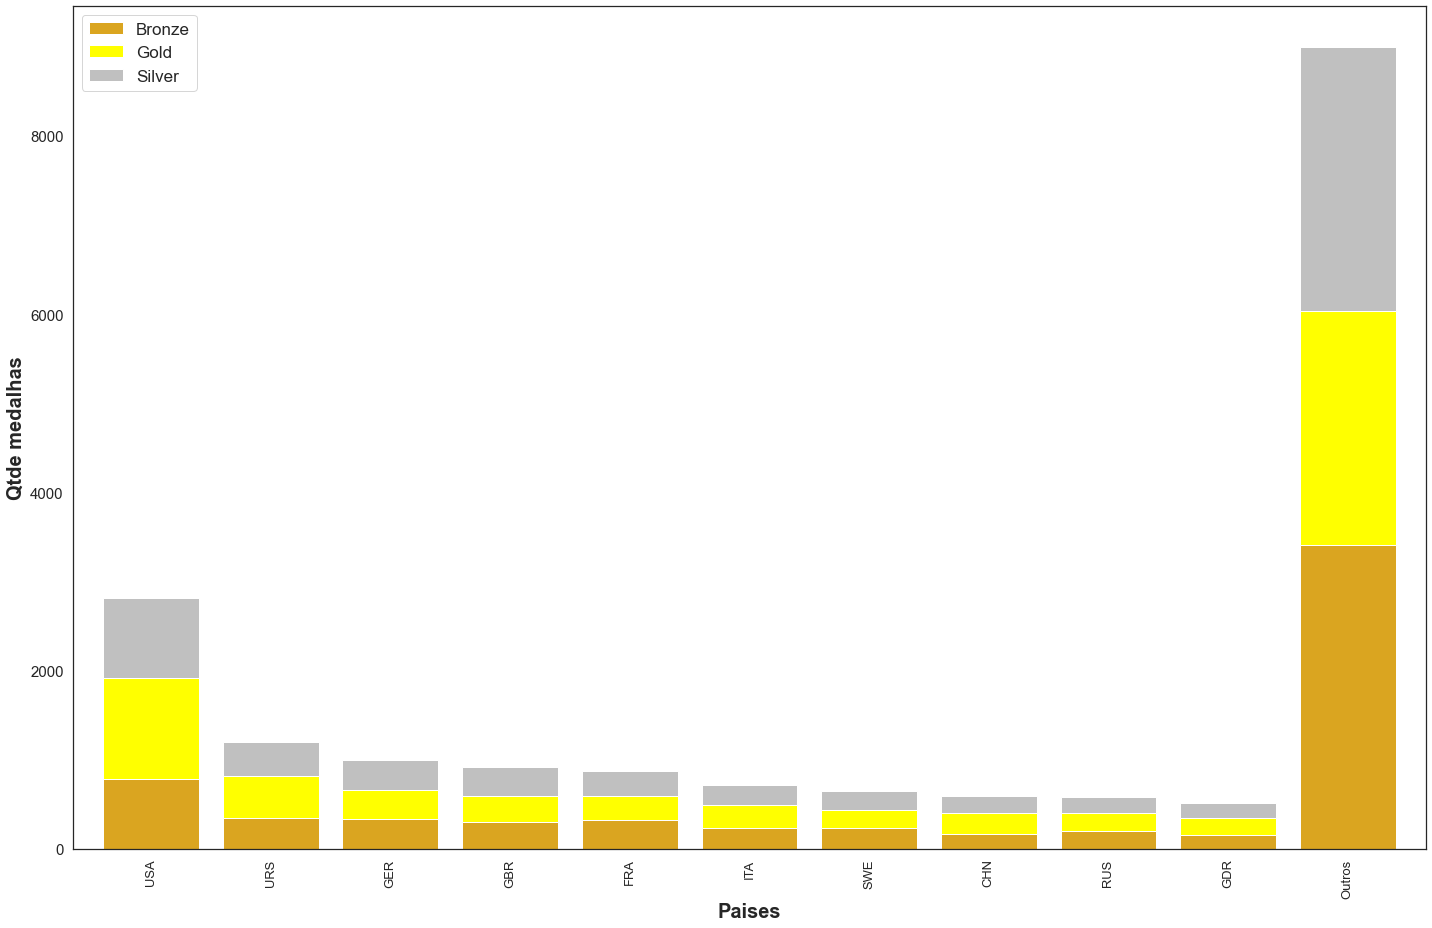

In [17]:
# separando por tipo de medalhas o df com as medalhas tratadas
tipo_medal_mundo = medal_mundo_unif.groupby(['NOC'])['Medal'].value_counts().reset_index(name = 'Quantidade').sort_values(by = ['NOC'])

# criando pivot com os tipos de medalhas em colunas
pivot_tipo_medal_mundo = tipo_medal_mundo.pivot(index = 'NOC', columns = 'Medal', values = 'Quantidade').fillna(0).sort_values(by = ['NOC'])

# usado df criado anteriormente ordenado por total medalhas com paises como indice 
# para poder usar o merge junto ao df pivot criado acima
medal_mundo_merge = medal_mundo_ordem.set_index('NOC')

# unindo os pivots
resultado = pd.merge(pivot_tipo_medal_mundo, medal_mundo_merge, on = ['NOC']).sort_values(by = ['Medal'], ascending = False)

# separando os top 10
top_barra = resultado[:10]

# acrescentando a linha 'Outros' com soma dos restantes dos paises
top_barra.loc['Outros'] = resultado[10:].sum()

#retirando a coluna Medal(Total)
top_barra.drop('Medal', axis = 1, inplace = True)

sns.set_style('white')
sns.set_palette(['goldenrod', 'yellow', 'silver'])
top_barra.plot(kind='bar', stacked=True, figsize=(20,13), width=0.8 );

plt.xticks(fontsize=13, rotation = 90)
plt.yticks(fontsize=15)
plt.xlabel('Paises', fontsize = 20, weight='bold', loc = 'center');
plt.ylabel('Qtde medalhas', fontsize = 20, weight='bold', loc = 'center');
plt.legend(loc='upper left', fontsize = 17)
plt.tight_layout();

Crie um gráfico de distribuição (por exemplo, um histograma) mostrando a quantidade total de medalhas por país.

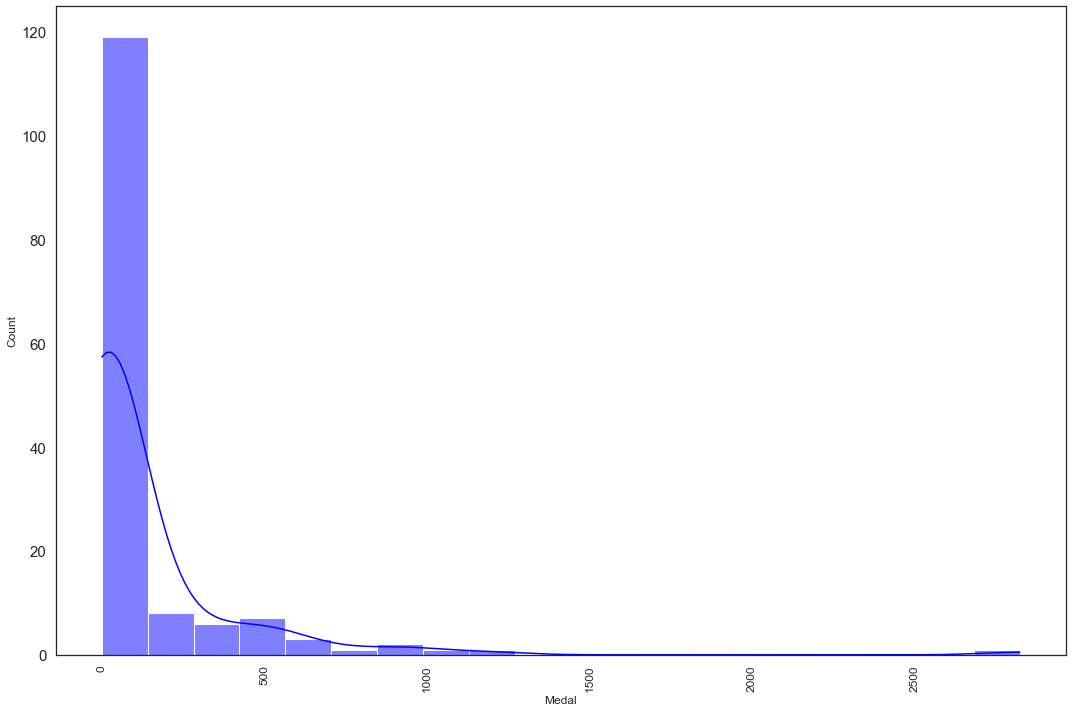

In [18]:
# df com quantidade total de medalhas
medal_mundo_ordem

plt.figure(figsize=(15,10))
sns.set_style('white')
sns.histplot(medal_mundo_ordem['Medal'], color = 'blue', kde=True, bins = 20);

plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=15)
plt.tight_layout();

**Desafio bônus:** Crie uma visualização da quantidade de medalhas de ouro e outra para quantidade total de medalhas por país, ambas utilizando mapas. Utilize o tipo de mapa que achar mais adequado.

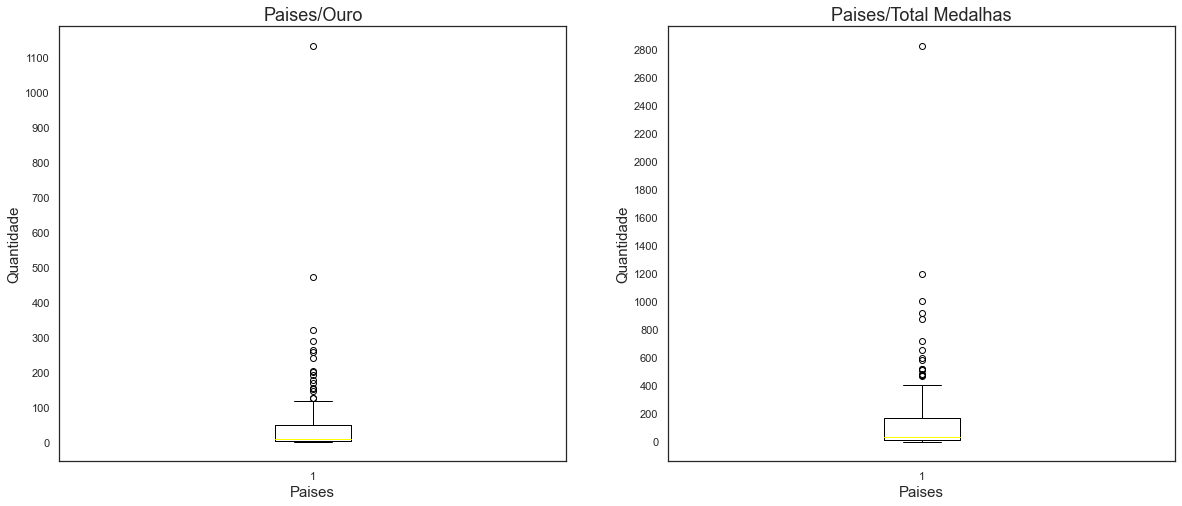

In [19]:
medal_mundo_ordem # total medalhas
#ouro_paises

merge_totalEouro = pd.merge(ouro_paises, medal_mundo_ordem, on = ['NOC'])
merge_totalEouro.rename(columns = {'Medal_x':'Gold', 'Medal_y': 'Total'}, inplace = True)

plt.subplots(figsize=(20,8))
# grafico 1 com qtde de medalhas 
plt.subplot(121)
#sns.boxplot(x='Gold', data=merge_totalEouro, showmeans=True);
plt.boxplot(merge_totalEouro['Gold']);
plt.title('Paises/Ouro', fontsize= 18 );
plt.xlabel('Paises', fontsize= 15 );
plt.ylabel('Quantidade', fontsize= 15 );
plt.yticks(np.arange(0, 1200, step=100))

plt.subplot(122)
#sns.boxplot(x='Total', data=merge_totalEouro, showmeans=True);
plt.boxplot(merge_totalEouro['Total']);
plt.title('Paises/Total Medalhas', fontsize= 18 );
plt.xlabel('Paises', fontsize= 15 );
plt.ylabel('Quantidade', fontsize= 15 );
plt.yticks(np.arange(0, 2900, step=200));


## 3. Brasil vs Mundo

Faça um gráfico de barras comparando os maiores medalhistas brasileiros com os maiores medalhistas do mundo em suas respectivas categorias.

Represente o esporte no eixo X, a quantidade de medalhas no eixo Y, coloque barras lado-a-lado representando os diferentes atletas de uma mesma modalidade e empilhe as medalhas de ouro, prata e bronze de cada atleta.

In [20]:
# os maiores esportitas brasileiros são da vela, e ambos participaram de diferentes categorias cada
# conforme se observa abaixo nas categorias que participaram em cada olimpíadas

esporte_maioresrobert = atletas_ol[(atletas_ol['Name'] == maiores_medal['Name'].iloc[0])]['Event'].tolist()

esporte_maiorestorben = atletas_ol[(atletas_ol['Name'] == maiores_medal['Name'].iloc[1])]['Event'].tolist()

print('Categorias Robert:',esporte_maioresrobert)
print('Categorias Torber:',esporte_maiorestorben)

Categorias Robert: ['Sailing Mixed One Person Dinghy', 'Sailing Mixed One Person Dinghy', 'Sailing Mixed One Person Dinghy', "Sailing Men's Two Person Keelboat", "Sailing Men's Two Person Keelboat", "Sailing Men's One Person Dinghy"]
Categorias Torber: ['Sailing Mixed Three Person Keelboat', 'Sailing Mixed Two Person Keelboat', 'Sailing Mixed Two Person Keelboat', 'Sailing Mixed Two Person Keelboat', 'Sailing Mixed Two Person Keelboat', "Sailing Men's Two Person Keelboat"]


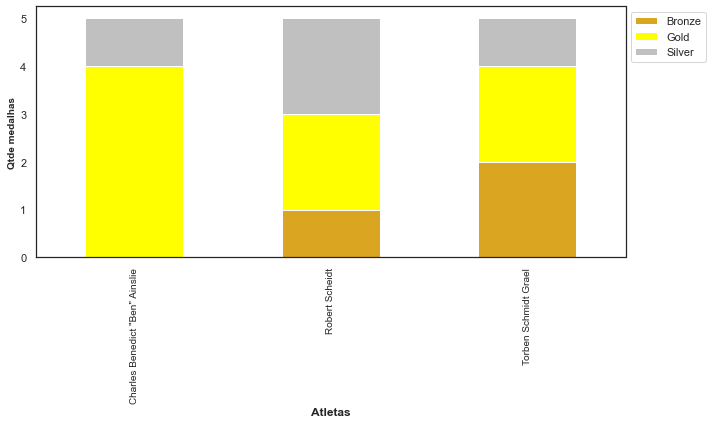

In [21]:
# Df com os maiores medalhistas brasileiros, no caso 2
maiores_medal

# como foram muitas categorias diferentes a comparação melhor seria por esporte

esporte_maiores1 = atletas_ol[(atletas_ol['Name'] == maiores_medal['Name'].iloc[0])]['Sport'].drop_duplicates()

#separando atletas da esporte vela
esporte_vel = atletas_ol[atletas_ol['Sport']==esporte_maiores1.iloc[0]]
esporte_vela = esporte_vel.groupby('Name')['Medal'].value_counts().reset_index(name = 'Quantidade')
# criando pivot dessa categoria
esporte_vela = esporte_vela.pivot(index = 'Name', columns = 'Medal', values = 'Quantidade' ).fillna(0)

# buscando atleta de maior quant de medalhas pelo esporte vela
atletas_medal_vela = atletas_ol.loc[(atletas_ol['Sport'] == esporte_maiores1.iloc[0])]
esporte_vela_maior = atletas_medal_vela.groupby('Name')['Medal'].count().sort_values(ascending = False).reset_index()

#DF com os dois atletas: Robert e o maior da categoria
df_esporte_vela = esporte_vela.loc[(esporte_vela.index == maiores_medal['Name'].iloc[0]) | 
                                      (esporte_vela.index == maiores_medal['Name'].iloc[1]) | 
                                             (esporte_vela.index == esporte_vela_maior.iloc[0]['Name'])]

#display(df_esporte_vela)
charles = np.array(df_esporte_vela.columns[:1])
robert = np.array(df_esporte_vela.columns[1:2])
torben = np.array(df_esporte_vela.columns[2:3])

# nao conegui deixar lado a lado, tendo varios codigos
sns.set_style('white')
sns.set_palette(['goldenrod', 'yellow', 'silver'])
df_esporte_vela.plot(kind='bar', stacked=True, figsize=(10,6) );

plt.xticks(fontsize=10, rotation = 90)
plt.xlabel('Atletas', fontsize = 12, weight='bold', loc = 'center');

plt.ylabel('Qtde medalhas', fontsize = 10, weight='bold', loc = 'center');
plt.legend(bbox_to_anchor = (1,1))
plt.tight_layout();

Repita o procedimento acima, mas ao invés de atletas, considere o(s) esporte(s) onde o Brasil mais possui medalha comparando-os com o país com maior quantidade de medalhas naquele esporte.

In [22]:
# agrupando por ano esporte e nome a quantidade de medalhas
medalhas_sport_t = atletas_br_medal.groupby(['Year', 'Sport', 'Name'])['Medal'].value_counts().reset_index(name = 'Quantidade')

# retirando atraves do drop_duplicates quando o ano e o esporte são iguais, ficando assim somente uma medalha por esporte e ano
medalhas_sport_t = medalhas_sport_t.drop_duplicates(subset=['Year','Sport', 'Medal'])

#agrupando por esporte para somar as medalhas
medalhas_sport_br = medalhas_sport_t.groupby('Sport')['Medal'].count().reset_index(name = 'Quantidade')

# atribuindo a quantidade maxima de medalhas que um esporte tem
maximo_medal = medalhas_sport_br['Quantidade'].max()
maximo_medal
# localizando o esportes que possuem esta quantidade de medalhas
esporte_maior_br = medalhas_sport_br.loc[medalhas_sport_br['Quantidade'] == maximo_medal]
print('Esporte com maior quantidade de medalhas:')
display(esporte_maior_br)

# df com todos atletas deste esporte
atletismo_medalhas = atletas_br_medal[atletas_br_medal['Sport'] == esporte_maior_br['Sport'][1]]

# separando por tipo de medalhas e retirando medalhas de mesmo ano
atletismo_medals_br = atletismo_medalhas.groupby(['NOC','Year', 'Name'])['Medal'].value_counts().reset_index(name = 'Quantidade')
atletismo_medals_br.drop_duplicates(subset = ['Year', 'Medal'], inplace = True)

# agrupando os tipos de medalhas com os totais
atletismo_medals_br2 = atletismo_medals_br.groupby(['NOC'])['Medal'].value_counts().reset_index(name = 'Quantidade')


atletismo_medals_br2 = atletismo_medals_br2.pivot(index = 'NOC', columns = 'Medal', values = 'Quantidade')
atletismo_medals_br2

Esporte com maior quantidade de medalhas:


Sport  Quantidade
1  Athletics          16

Medal  Bronze  Gold  Silver
NOC                        
BRA         8     5       3

In [23]:
# separando df somente com o esporte atletismo
df_esporte_maior_br = atletas_ol[atletas_ol['Sport'] == esporte_maior_br['Sport'][1]]
df_esporte_maior_br.drop_duplicates(subset = ['NOC','Year', 'Medal', 'Event'])

# df com as totais de tipo medalhas por pais e ordenando e separando o primeiro do ranking
df_atletismo__mundo = df_esporte_maior_br.groupby(['NOC'])['Medal'].count().sort_values(ascending = False).reset_index()
df_atletismo__mundo['NOC'][0]

df_atletismo_porMedal = df_esporte_maior_br.groupby(['NOC'])['Medal'].value_counts().reset_index(name = 'Quantidade')
df_atletismo_porMedal = df_atletismo_porMedal.pivot(index = 'NOC', columns = 'Medal', values = 'Quantidade').fillna(0)
df_atletismo_comparar = df_atletismo_porMedal.loc[(df_atletismo_porMedal.index == 'BRA') |
                                                   (df_atletismo_porMedal.index == df_atletismo__mundo['NOC'][0])]

df_atletismo_comparar

Medal  Bronze   Gold  Silver
NOC                         
BRA     14.00   5.00    7.00
USA    221.00 542.00  317.00

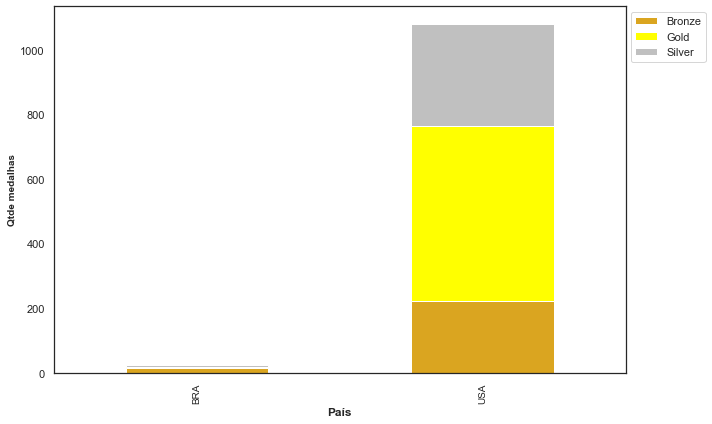

In [44]:
sns.set_style('white')
sns.set_palette(['goldenrod', 'yellow', 'silver'])
df_atletismo_comparar.plot(kind='bar', stacked=True, figsize=(10,6) );

plt.xticks(fontsize=10, rotation = 90)
plt.xlabel('País', fontsize = 12, weight='bold', loc = 'center');

plt.ylabel('Qtde medalhas', fontsize = 10, weight='bold', loc = 'center');
plt.legend(bbox_to_anchor = (1,1))
plt.tight_layout();

Para finalizar, repita os gráficos que você gerou com os 10 países com mais medalhas, mas remova o Brasil da categoria "Outros" e mostre-o também no gráfico.

In [49]:
# utilizando o df anterior de medalhas de ouro e verificando a posicao do Brasil
pos_br = ouro_paises[ouro_paises['NOC']=='BRA']
# resto dos paises sem o brasil
resto_mundo_s_br = ouro_paises[10:].drop([35]).sum()['Medal']

# adicionando os paises e quantidades de medalhas
top_dez.loc[10]=['Brasil', pos_br['Medal']]
top_dez.loc[11]=['Outros', resto_mundo_s_br]

fig = px.pie(top_dez, values='Medal', names='NOC', title='Top 10 medalhas de ouro e resto do mundo(Outros)');
fig.show()

In [50]:

# utilizando o df anterior de medalhas totais e verificando a posicao do Brasil
pos_br_total = medal_mundo_ordem[medal_mundo_ordem['NOC']=='BRA']
pos_br_total
# resto dos paises sem o brasil
resto_mundo_s_br_total = medal_mundo_ordem[10:].drop([32]).sum()['Medal']


# adicionando os paises e quantidades de medalhas
top_dez_geral.loc[10]=['Brasil', pos_br_total['Medal']]
top_dez_geral.loc[11]=['Outros', resto_mundo_s_br_total]

fig = px.pie(top_dez_geral, values='Medal', names='NOC', title='Top 10 medalhas de ouro e resto do mundo(Outros)');
fig.show()